<a href="https://colab.research.google.com/github/AndrsGzRo/incendios-forestales-mx/blob/main/Incendios_Forestales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de Incendios Forestales

In [148]:
!pip install squarify

In [149]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [79]:
# Dataframe
url = 'https://raw.githubusercontent.com/AndrsGzRo/incendios-forestales-mx/refs/heads/main/data-2025-11-05.csv'
df = pd.read_csv(url)

# Primeros cincos renglones
df.head()

,anio,Clave_del_incendio,latitud,longitud,Clave_Municipio,Estado,Municipio,CVE_ENT,CVE_MUN,CVEGEO,...,Entidad,fn_Clave_del_incendio,fn_Predio,fn_Causa,fn_Causa_especifica,fn_Duracion_dias,fn_Tipo_de_incendio,fn_Tipo_Vegetacion,fn_Tipo_impacto,fn_Tamano
0,2015,15-01-0001,21.995503,-102.750478,3.0,Aguascalientes,Calvillo,1,3.0,301,...,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,15-01-0002,21.773878,-102.300881,1.0,Aguascalientes,Aguascalientes,1,1.0,101,...,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,15-01-0003,21.785075,-102.319444,1.0,Aguascalientes,Aguascalientes,1,1.0,101,...,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,15-01-0004,22.224067,-102.336411,7.0,Aguascalientes,Rincón de Romos,1,7.0,701,...,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,15-01-0005,22.041083,-101.973917,2.0,Aguascalientes,Asientos,1,2.0,201,...,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.1 Información de dataframe

In [80]:
def info_df(df):
    print('---------Información general del Dataframe---------')
    print(df.info())
    print('---------Estadísticas del df---------')
    print(df.describe())
    print('---------Valores nulos---------')
    print(df.isnull().sum().sort_values(ascending=False))
    print('---------Valores únicos---------')
    print(df.nunique())

info_df(df)

---------Información general del Dataframe---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71089 entries, 0 to 71088
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anio                   71089 non-null  int64  
 1   Clave_del_incendio     71089 non-null  object 
 2   latitud                71089 non-null  float64
 3   longitud               71089 non-null  float64
 4   Clave_Municipio        71075 non-null  float64
 5   Estado                 71089 non-null  object 
 6   Municipio              71089 non-null  object 
 7   CVE_ENT                71089 non-null  int64  
 8   CVE_MUN                71089 non-null  float64
 9   CVEGEO                 71089 non-null  int64  
 10  Region                 71089 non-null  object 
 11  Predio                 71087 non-null  object 
 12  Causa                  71089 non-null  object 
 13  Causa_especifica       71089 non-null  object 
 14  Fe

## 1.2 Limpieza

Se eliminarán las variables que empiezan con ``` fn_``` ya que suelen ser valores nulos.




In [81]:
# Eliminando columnas fn
df_raw= df.copy()
df_clean= df_raw.loc[:,~df.columns.str.startswith('fn_')].copy()
info_df(df_clean)

---------Información general del Dataframe---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71089 entries, 0 to 71088
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   anio                71089 non-null  int64  
 1   Clave_del_incendio  71089 non-null  object 
 2   latitud             71089 non-null  float64
 3   longitud            71089 non-null  float64
 4   Clave_Municipio     71075 non-null  float64
 5   Estado              71089 non-null  object 
 6   Municipio           71089 non-null  object 
 7   CVE_ENT             71089 non-null  int64  
 8   CVE_MUN             71089 non-null  float64
 9   CVEGEO              71089 non-null  int64  
 10  Region              71089 non-null  object 
 11  Predio              71087 non-null  object 
 12  Causa               71089 non-null  object 
 13  Causa_especifica    71089 non-null  object 
 14  Fecha_Inicio        71086 non-null  float64
 15  F

### 1.3 Transformación de Variables

#### 1.3.1 Duracion_dias
Las variables anteriores tienen un formato correcto, excepto ```Duracion_dias```, la cual será transformada a una ordinal.


In [82]:
mapa_duraciones = {
    '1 Día': 1,
    '2 a 3 Días': 2.5,
    '4 a 7 Días':5.5,
    'Mayor de 7 Días':10
}
df_clean['Duracion_dias_num'] = df_clean['Duracion_dias'].map(mapa_duraciones)

#### 1.3.2 Fecha_Inicio y Fecha_Termino
Al estar en TimeStamp es necesario transformar las variables a DateTime para comprender mejor la duración de los incendios.

In [83]:
# Fecha Inicio
df_clean = df_clean.dropna(subset=['Fecha_Inicio'])
df_clean['Fecha_Inicio'] = pd.to_datetime('1970-01-01') + pd.to_timedelta(df_clean['Fecha_Inicio'], unit='D')

# Fecha Termino
df_clean['Fecha_Termino'] = pd.to_datetime('1970-01-01') + pd.to_timedelta(df_clean['Fecha_Termino'], unit='D')

# Año, mes y duracion
df_clean['anio_inicio'] = df_clean['Fecha_Inicio'].dt.year.astype(int)
df_clean['mes_inicio'] = df_clean['Fecha_Inicio'].dt.month
df_clean['duracion_real'] = (df_clean['Fecha_Termino'] - df_clean['Fecha_Inicio']).dt.days

#### 1.3.1 Estación del Año

In [84]:
def estacion(mes):
    if mes in [12,1,2]:
        return 'Invierno'
    elif mes in [3,4,5]:
        return 'Primavera'
    elif mes in [6,7,8]:
        return 'Verano'
    elif mes in [9,10,11]:
        return 'Otoño'
df_clean['estacion'] = df_clean['mes_inicio'].apply(estacion)

### 1.4 Normalización de Texto

#### 1.4.1 Causa

In [85]:
# Pasar todo a minúsculas y quitar espacios sobrantes
df_clean['Causa'] = df_clean['Causa'].str.strip().str.lower()
df_clean['Causa'].value_counts()

,count
Causa,
intencional,13023
actividades agrícolas,10843
desconocidas,9269
actividades agropecuarias,8225
fogatas,6183
actividades ilícitas,5991
actividades pecuarias,4613
fumadores,4217
cazadores,1931


In [92]:
# Juntando 0 y Ninguna/No Aplica
df_clean['Causa'] = df_clean['Causa'].replace({
    'ninguna / no aplica': 'no aplica',
    '0':'no aplica'
})
df_clean['Causa'].value_counts()

,count
Causa,
intencional,13023
actividades agrícolas,10843
desconocidas,9269
actividades agropecuarias,8225
fogatas,6183
actividades ilícitas,5991
actividades pecuarias,4613
fumadores,4217
cazadores,1931


#### 1.4.2 Tipo de Incendio

In [220]:
df['Tipo_de_incendio'].unique()

array(['Superficial', 'Mixto', '0', 'Subterráneo', 'superficial',
       'SUPERFICIAL', 'De copa', 'mixto'], dtype=object)

In [223]:
# Pasar todo a minúsculas y quitar espacios sobrantes
df_clean['Tipo_de_incendio'] = df_clean['Tipo_de_incendio'].str.strip().str.lower()
df_clean['Tipo_de_incendio'].value_counts()

,count
Tipo_de_incendio,
superficial,68298
mixto,2631
subterráneo,120
de copa,36
0,1


## 2. Visualizaciones

### 2.1 Número de incendios por año

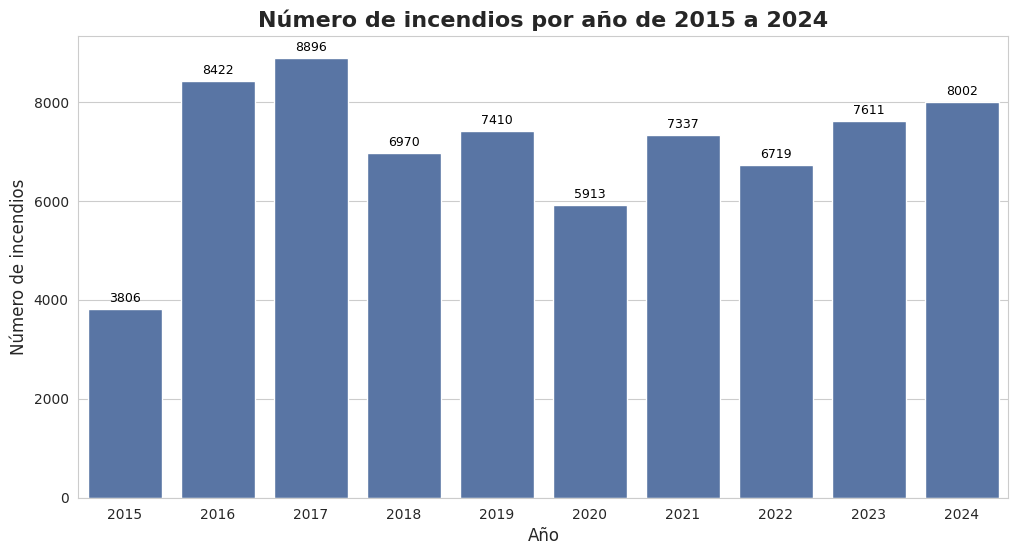

In [217]:
sns.set_style('whitegrid')
sns.set_palette('deep')
plt.figure(figsize=(12,6))
ax = sns.countplot(
    x='anio',
    data=df_clean,
)
for container in ax.containers:
    ax.bar_label(container,padding=3,fontsize=9,color='black')

plt.xlabel('Año',fontsize=12)
plt.ylabel('Número de incendios',fontsize=12)
plt.title('Número de incendios por año de 2015 a 2024',fontsize=16,fontweight='bold')
plt.show()

### 2.2 Treemap de Incendios por Estación

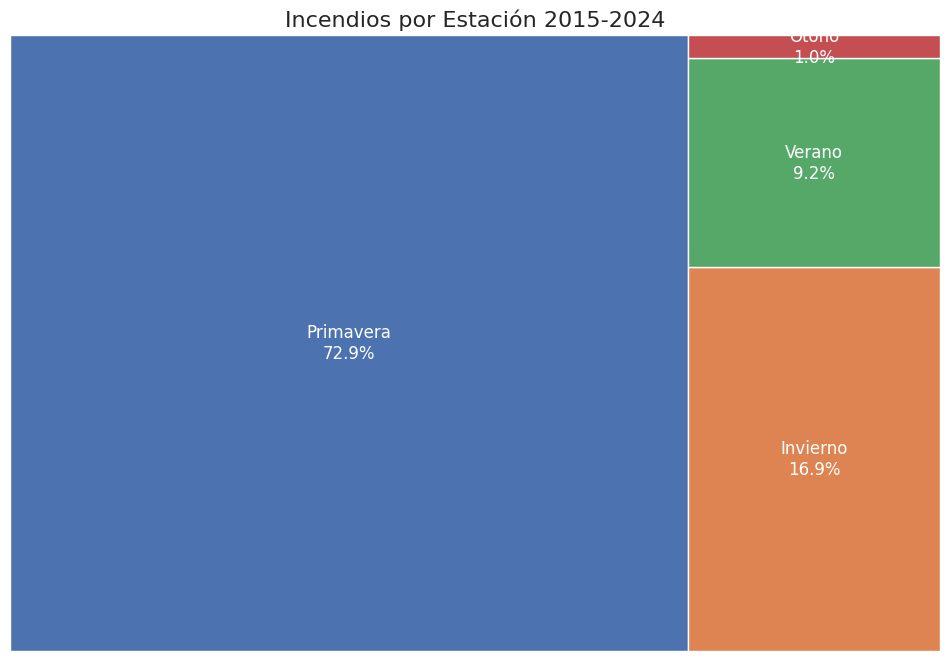

In [198]:
estacion = df_clean['estacion'].value_counts()
labels = [f"{i}\n{v/estacion.sum():.1%}" for i, v in zip(estacion.index, estacion.values)]
# Treemap
plt.figure(figsize=(12,8))
squarify.plot(
    sizes = estacion.values,
    label = labels,
    color=sns.color_palette('deep',n_colors=len(estacion)),
    text_kwargs={'fontsize':12,'color':'white'}
)
plt.title('Incendios por Estación 2015-2024',fontsize=16)
plt.axis('off')
plt.show()

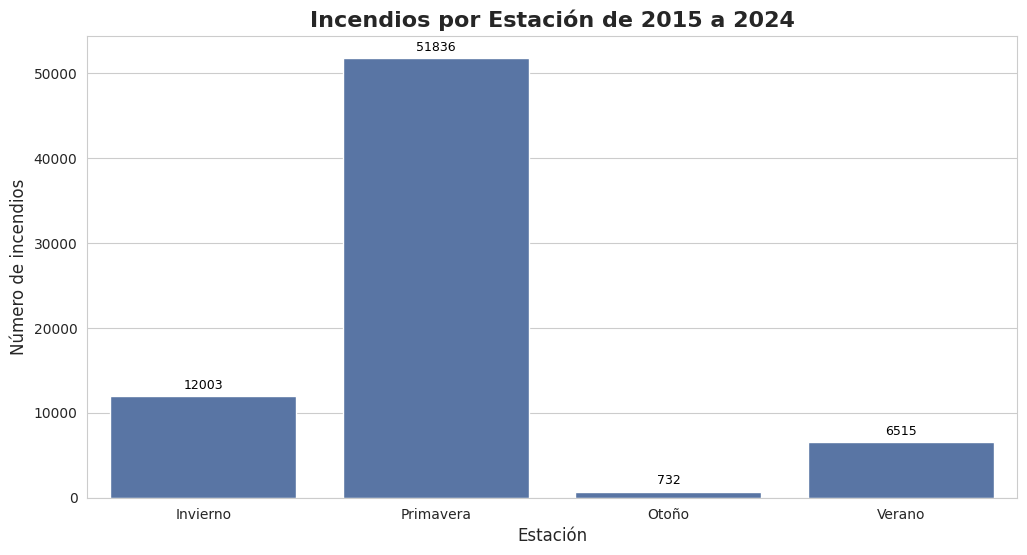

In [216]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='estacion',data=df_clean)
for container in ax.containers:
    ax.bar_label(container,padding=3,fontsize=9,color='black')
plt.xlabel('Estación',fontsize=12)
plt.ylabel('Número de incendios',fontsize=12)
plt.title('Incendios por Estación de 2015 a 2024',fontsize=16,fontweight='bold')
plt.show()

### 2.3 Incedios por Causa

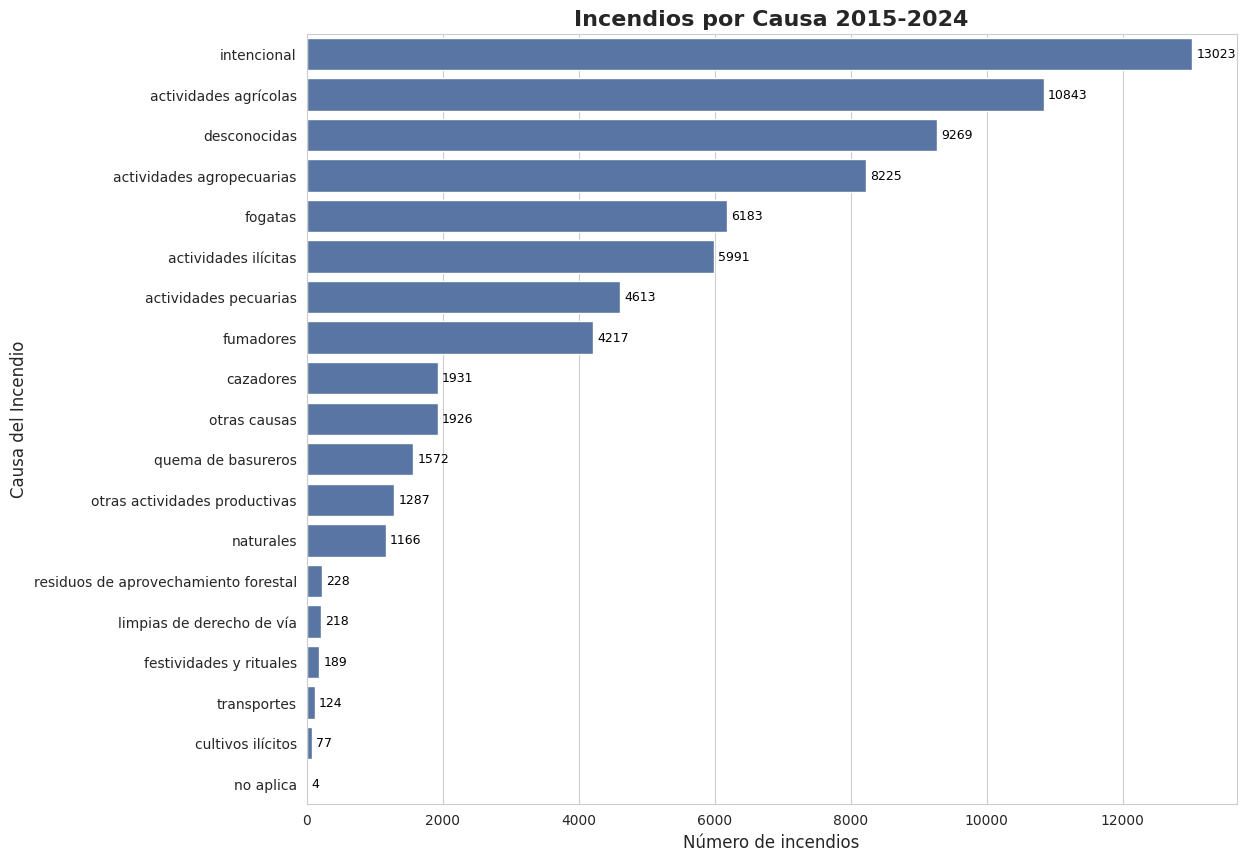

In [192]:
plt.figure(figsize=(12,10))
ax = sns.countplot(
    y='Causa',
    data=df_clean,order=df_clean['Causa'].value_counts().index,
)
for container in ax.containers:
    ax.bar_label(container,padding=3,fontsize=9,color='black')

plt.xlabel('Número de incendios',fontsize=12)
plt.ylabel('Causa del Incendio',fontsize=12)
plt.title('Incendios por Causa 2015-2024',fontsize=16,fontweight='bold')
plt.show()

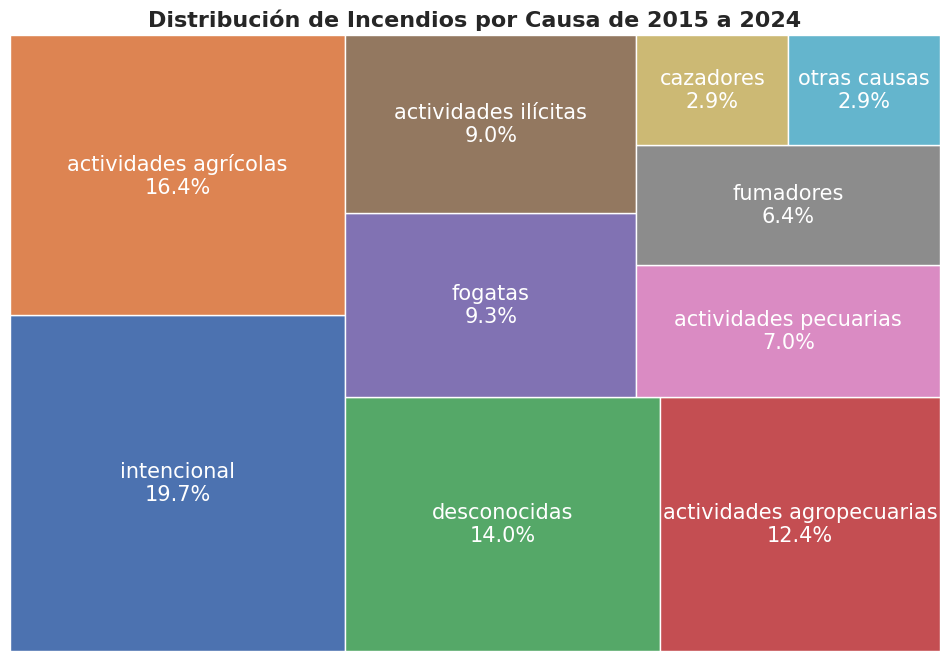

In [215]:
causas = df_clean['Causa'].value_counts().head(10)
labels = [f"{i}\n{v/causas.sum():.1%}" for i, v in zip(causas.index, causas.values)]
# Treemap
plt.figure(figsize=(12,8))
squarify.plot(
    sizes = causas.values,
    label = labels,
    color=sns.color_palette('deep',n_colors=len(causas)),
    text_kwargs={'fontsize':15,'color':'white'}
)
plt.title('Distribución de Incendios por Causa de 2015 a 2024',fontsize=16,fontweight='bold')
plt.axis('off')
plt.show()

### 2.4 Concentración de incendios por mes y año

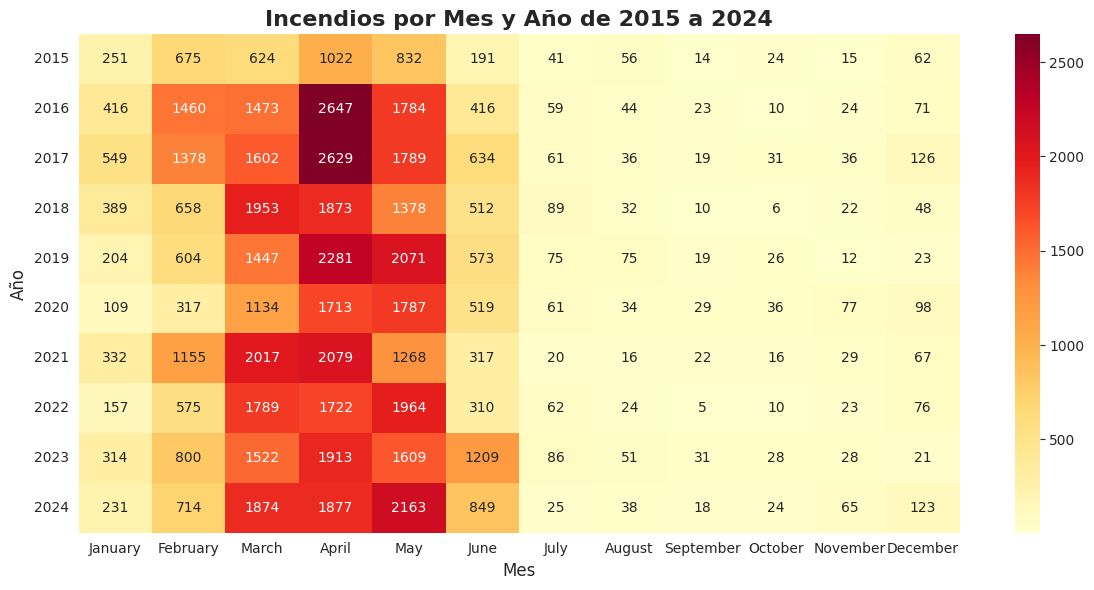

In [214]:
import calendar
tabla = df_clean.pivot_table(
    index='anio_inicio',
    columns='mes_inicio',
    values = 'Causa',
    aggfunc='count',
    fill_value=0
)
tabla.columns = [calendar.month_name[i] for i in tabla.columns]
plt.figure(figsize=(12,6))
sns.heatmap(
    tabla,
    cmap='YlOrRd',
    annot=True,
    fmt='g'
)
plt.title('Incendios por Mes y Año de 2015 a 2024',fontsize=16,fontweight='bold')
plt.xlabel('Mes',fontsize=12)
plt.ylabel('Año',fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()